In [144]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as iv3_preprocess_input
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [15]:
working_folder = 'd:/Dane/MNIST-fashion-test/'

In [16]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [17]:
def load_mnist_fashion():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    
    # Print dataset shapes
    print("Training data shape:", x_train.shape)
    print("Test data shape:", x_test.shape)

    return x_train, y_train, x_test, y_test

In [18]:
def resize_images(images, target_size):
    return np.array([tf.image.resize(image, target_size).numpy() for image in images])

In [39]:
x_train, y_train, x_test, y_test = load_mnist_fashion()
y_train_categorical = to_categorical(y_train, num_classes = 10)
y_test_categorical = to_categorical(y_test, num_classes = 10)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [40]:
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)

In [41]:
print(x_train_expanded.shape)
print(x_test_expanded.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
x_train_resized_32_32 = resize_images(x_train_expanded, (32, 32))

In [66]:
x_test_resized_32_32 = resize_images(x_test_expanded, (32, 32))

In [68]:
print(x_train_resized_32_32.shape)
print(x_test_resized_32_32.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [164]:
def create_model_from_inceptionV3(input_shape, outputs_count):
    base_model = InceptionV3(include_top = False, weights='imagenet', input_shape = input_shape)
    
    for layer in base_model.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, iv3_preprocess_input)

In [129]:
def create_model_from_DenseNet_trainable(input_shape, outputs_count):
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = input_shape)
    
    #for layer in base_model.layers:
    #    layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, densenet_preprocess_input, 'densenet_trainable')

In [94]:
def create_model_from_VGG19_trainable(input_shape, outputs_count):
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = input_shape)
    
    #for layer in base_model.layers:
    #    layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, vgg19_preprocess_input, 'vgg19_trainable')

In [70]:
def create_model_from_VGG19(input_shape, outputs_count):
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = input_shape)
    
    for layer in base_model.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, vgg19_preprocess_input, 'vgg19')

In [71]:
def create_model_from_VGG16(input_shape, outputs_count):
    base_model = VGG16(
        include_top = False,
        weights = "imagenet",
        input_shape = input_shape)
    
    for layer in base_model.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, vgg16_preprocess_input, 'vgg16')

In [84]:
def create_model_from_VGG16_trainable(input_shape, outputs_count):
    base_model = VGG16(
        include_top = False,
        weights = "imagenet",
        input_shape = input_shape)
    
    #for layer in base_model.layers:
    #    layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        base_model,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(64),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(outputs_count, activation='softmax')
    ])
    
    return (new_model, vgg16_preprocess_input, 'VGG16_trainable')

In [112]:
def create_model_from_scratch(input_shape, outputs_count):
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification

    return (model, None, 'custom')

In [119]:
def create_model_from_scratch_2(input_shape, outputs_count):
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification

    return (model, None, 'custom2')

In [116]:
input_shape = (75, 75, 3)
outputs_count = 10
(model, preprocessing_function) = create_model_from_inceptionV3(input_shape, outputs_count)

NameError: name 'create_model_from_inceptionV3' is not defined

In [101]:
input_shape = (32, 32, 3)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_VGG19_trainable(input_shape, outputs_count)
x_train_prepared = np.repeat(x_train_resized_32_32, 3, axis=-1)
y_train_prepared = y_train_categorical
x_test_prepared = np.repeat(x_test_resized_32_32, 3, axis=-1)
y_test_prepared = y_test_categorical

In [85]:
input_shape = (32, 32, 3)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_VGG16_trainable(input_shape, outputs_count)
x_train_prepared = np.repeat(x_train_resized_32_32, 3, axis=-1)
y_train_prepared = y_train_categorical
x_test_prepared = np.repeat(x_test_resized_32_32, 3, axis=-1)
y_test_prepared = y_test_categorical

In [74]:
input_shape = (32, 32, 3)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_VGG16(input_shape, outputs_count)
x_train_prepared = np.repeat(x_train_resized_32_32, 3, axis=-1)
y_train_prepared = y_train_categorical
x_test_prepared = np.repeat(x_test_resized_32_32, 3, axis=-1)
y_test_prepared = y_test_categorical

In [50]:
input_shape = (28, 28, 1)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_scratch(input_shape, outputs_count)
x_train_prepared = x_train_expanded
y_train_prepared = y_train_categorical
x_test_prepared = x_test_expanded
y_test_prepared = y_test_categorical

In [133]:
input_shape = (28, 28, 1)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_scratch_2(input_shape, outputs_count)
x_train_prepared = x_train_expanded
y_train_prepared = y_train_categorical
x_test_prepared = x_test_expanded
y_test_prepared = y_test_categorical

In [135]:
input_shape = (32, 32, 3)
outputs_count = 10
(model, preprocessing_function, model_name) = create_model_from_DenseNet_trainable(input_shape, outputs_count)
x_train_prepared = np.repeat(x_train_resized_32_32, 3, axis=-1)
y_train_prepared = y_train_categorical
x_test_prepared = np.repeat(x_test_resized_32_32, 3, axis=-1)
y_test_prepared = y_test_categorical

In [136]:
checkpointer = ModelCheckpoint(filepath = working_folder +'MF_best_val_loss_weights.h5', verbose = 1, monitor = 'val_loss', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer2 = ModelCheckpoint(filepath = working_folder +'MF_best_accuracy_weights.h5', verbose = 1, monitor = 'accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer3 = ModelCheckpoint(filepath = working_folder +'MF_best_val_accuracy_weights.h5', verbose = 1, monitor = 'val_accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased

In [137]:
train_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = preprocessing_function
)

train_data_iterator = train_generator.flow(
    x_train_prepared, 
    y_train_prepared, 
    batch_size = 32)

In [138]:
validation_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = preprocessing_function
)

validation_data_iterator = train_generator.flow(
    x_test_prepared, 
    y_test_prepared, 
    batch_size = 32)

In [139]:
def scheduler_I(epoch, lr):
    if epoch < 20:
        return 0.001
    
    if epoch < 40:
        return 0.0005
    
    if epoch < 50:
        return 0.0001
    
    return 0.00005

In [140]:
learning_rate_scheduler_callback = LearningRateScheduler(scheduler_I)

In [141]:
csv_logger = CSVLogger(working_folder + 'MF-training-' + model_name + '.log')

In [142]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
json_string = model.to_json()
open(working_folder + 'MF_' + model_name + '_architecture.json', 'w').write(json_string)

history = model.fit_generator(
    train_data_iterator,
    validation_data = validation_data_iterator,
    epochs = 50,
    callbacks = [checkpointer, checkpointer2, checkpointer3, learning_rate_scheduler_callback, csv_logger]
)

Epoch 1/50


C:\Users\ax\AppData\Local\Temp\ipykernel_21024\1739603974.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1875/1875 [==============================] - ETA: 0s - loss: 0.8984 - accuracy: 0.6789
Epoch 1: val_loss improved from inf to 0.82701, saving model to d:/Dane/MNIST-fashion-test\MF_best_val_loss_weights.h5

Epoch 1: accuracy improved from -inf to 0.67893, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 1: val_accuracy improved from -inf to 0.71190, saving model to d:/Dane/MNIST-fashion-test\MF_best_val_accuracy_weights.h5
1875/1875 [==============================] - 169s 83ms/step - loss: 0.8984 - accuracy: 0.6789 - val_loss: 0.8270 - val_accuracy: 0.7119 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.7589
Epoch 2: val_loss improved from 0.82701 to 0.79251, saving model to d:/Dane/MNIST-fashion-test\MF_best_val_loss_weights.h5

Epoch 2: accuracy improved from 0.67893 to 0.75893, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 2: val_accuracy improved from 0.71190 to 0.

1875/1875 [==============================] - ETA: 0s - loss: 0.3656 - accuracy: 0.8644
Epoch 15: val_loss improved from 0.38090 to 0.37324, saving model to d:/Dane/MNIST-fashion-test\MF_best_val_loss_weights.h5

Epoch 15: accuracy improved from 0.86360 to 0.86435, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 15: val_accuracy improved from 0.85880 to 0.86740, saving model to d:/Dane/MNIST-fashion-test\MF_best_val_accuracy_weights.h5
1875/1875 [==============================] - 160s 86ms/step - loss: 0.3656 - accuracy: 0.8644 - val_loss: 0.3732 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 16/50
1875/1875 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8687
Epoch 16: val_loss did not improve from 0.37324

Epoch 16: accuracy improved from 0.86435 to 0.86870, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 16: val_accuracy did not improve from 0.86740
1875/1875 [==============================] - 157s 84ms/st

1875/1875 [==============================] - ETA: 0s - loss: 0.2615 - accuracy: 0.9011
Epoch 30: val_loss did not improve from 0.28385

Epoch 30: accuracy improved from 0.90082 to 0.90108, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 30: val_accuracy did not improve from 0.89530
1875/1875 [==============================] - 158s 84ms/step - loss: 0.2615 - accuracy: 0.9011 - val_loss: 0.3033 - val_accuracy: 0.8868 - lr: 5.0000e-04
Epoch 31/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.9015
Epoch 31: val_loss did not improve from 0.28385

Epoch 31: accuracy improved from 0.90108 to 0.90153, saving model to d:/Dane/MNIST-fashion-test\MF_best_accuracy_weights.h5

Epoch 31: val_accuracy did not improve from 0.89530
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2612 - accuracy: 0.9015 - val_loss: 0.2938 - val_accuracy: 0.8935 - lr: 5.0000e-04
Epoch 32/50
1875/1875 [==============================] -

1875/1875 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.9210
Epoch 46: val_loss did not improve from 0.24353

Epoch 46: accuracy did not improve from 0.92367

Epoch 46: val_accuracy did not improve from 0.91130
1875/1875 [==============================] - 155s 83ms/step - loss: 0.2065 - accuracy: 0.9210 - val_loss: 0.2466 - val_accuracy: 0.9087 - lr: 1.0000e-04
Epoch 47/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9230
Epoch 47: val_loss did not improve from 0.24353

Epoch 47: accuracy did not improve from 0.92367

Epoch 47: val_accuracy did not improve from 0.91130
1875/1875 [==============================] - 155s 83ms/step - loss: 0.2024 - accuracy: 0.9230 - val_loss: 0.2441 - val_accuracy: 0.9099 - lr: 1.0000e-04
Epoch 48/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.9232
Epoch 48: val_loss did not improve from 0.24353

Epoch 48: accuracy did not improve from 0.92367

Epoch 48: v

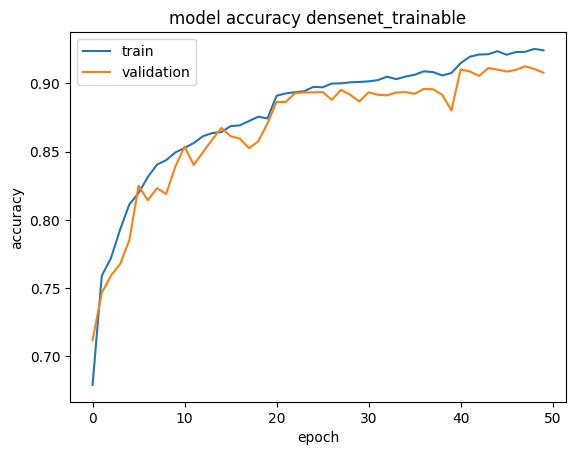

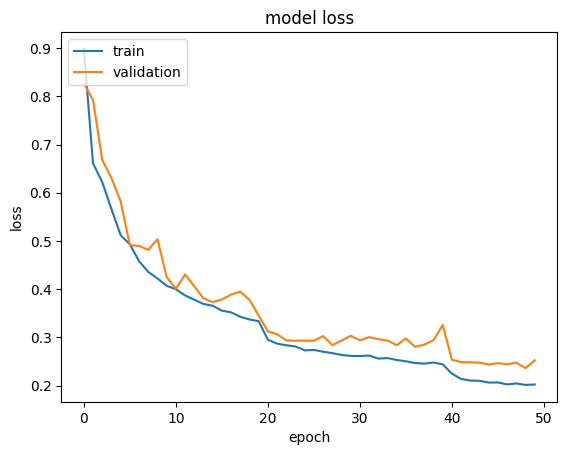

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
test_generator = ImageDataGenerator(
    preprocessing_function = preprocessing_function
)

test_data_iterator = train_generator.flow(
    x_test_prepared, 
    y_test_prepared, 
    batch_size = 32);

In [148]:
score_seg = model.evaluate_generator(test_data_iterator)

C:\Users\ax\AppData\Local\Temp\ipykernel_21024\2999289502.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_seg = model.evaluate_generator(test_data_iterator)


In [149]:
score_seg

[0.24907858669757843, 0.9077000021934509]

In [150]:
y_pred = model.predict_generator(test_data_iterator)

C:\Users\ax\AppData\Local\Temp\ipykernel_21024\1169745802.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data_iterator)


In [153]:
y_true = y_test

In [151]:
y_pred_max = np.argmax(y_pred, axis=1)

In [154]:
cm = confusion_matrix(y_true, y_pred_max)

In [155]:
print(cm)

[[103 125 109 105  77  81 107  92 108  93]
 [106  90  98 105  92 101  94 118  99  97]
 [ 89  91 117 101  91 130  86 105  96  94]
 [ 91  90 101 101  94  86 105 117 103 112]
 [104 103 129  89 102  92  93  85 107  96]
 [ 99 106 104  86  91 113 109 100 116  76]
 [126  89 106  92 102 105  86  99  86 109]
 [ 96 100  87 105 102 105  84 101 105 115]
 [122  99 104  98 100  89  88 104 101  95]
 [ 88  98 110 117 102  91 102 101  97  94]]


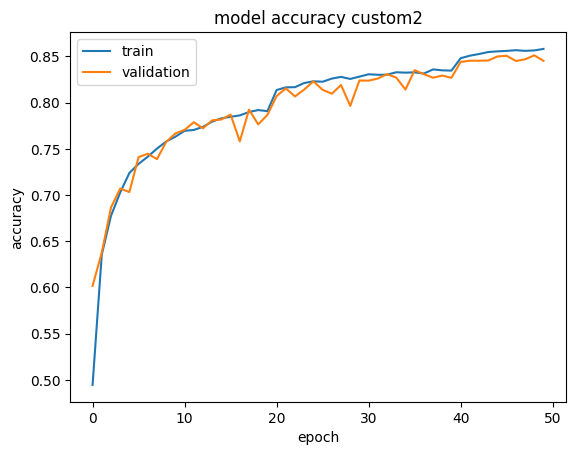

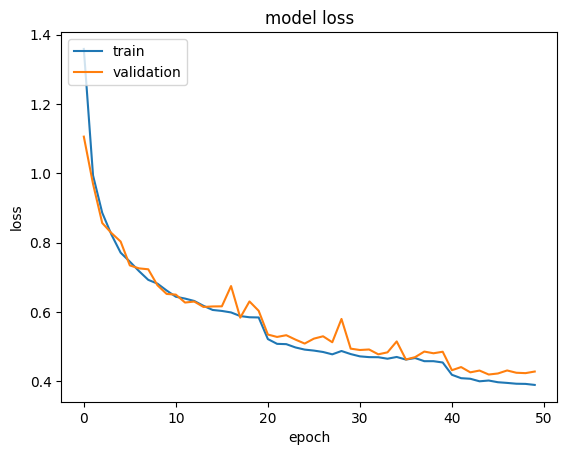

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

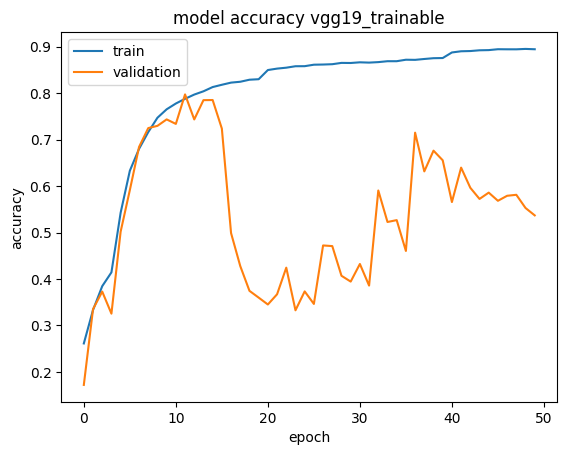

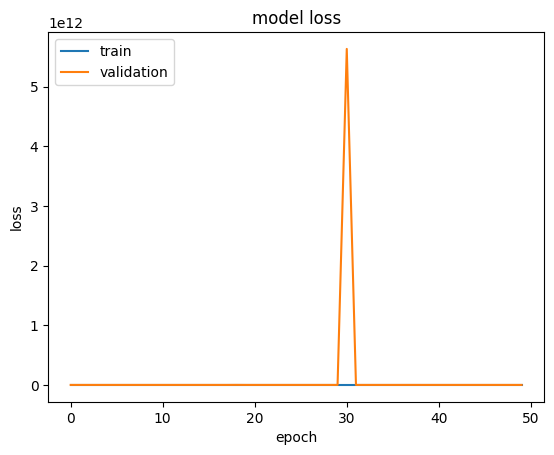

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

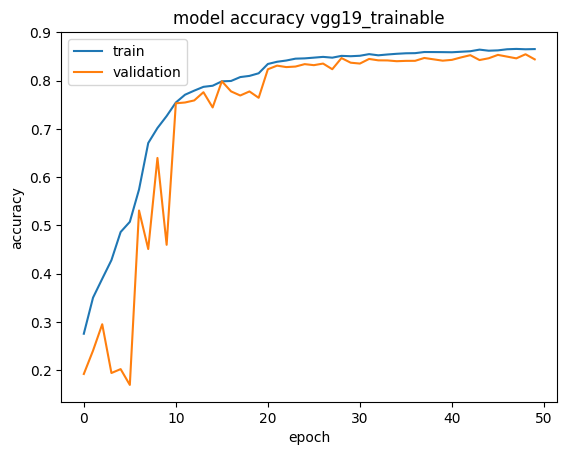

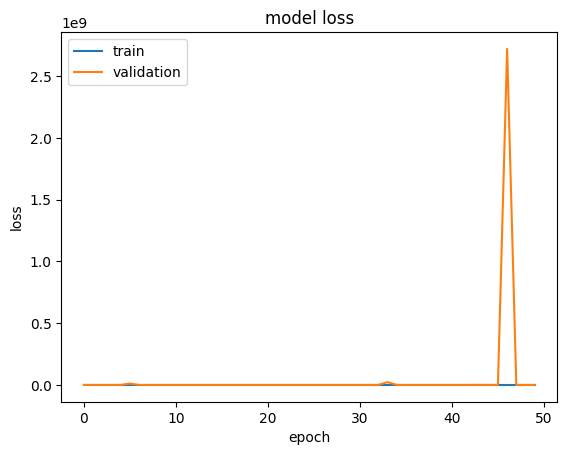

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

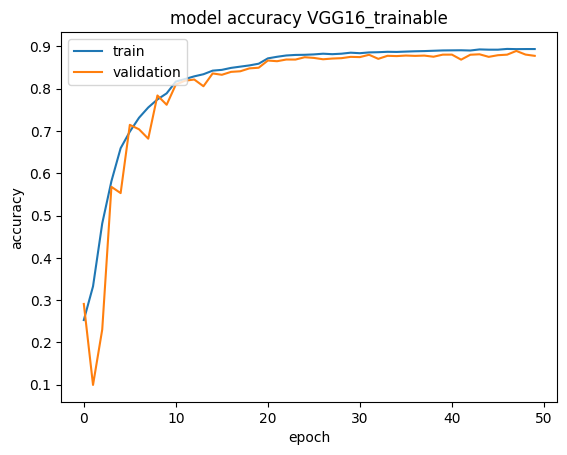

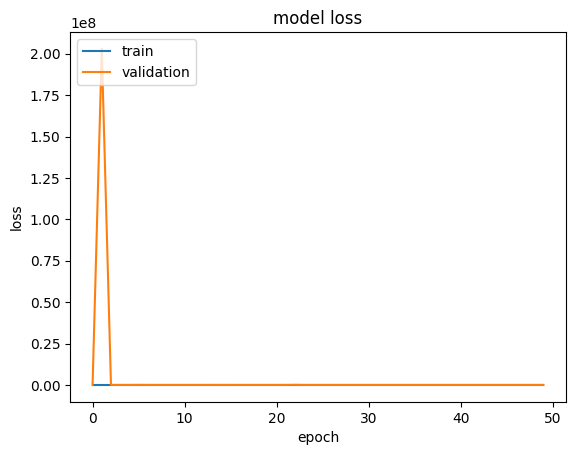

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

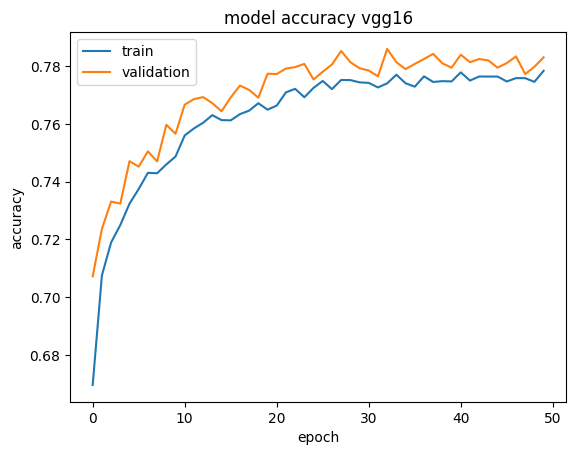

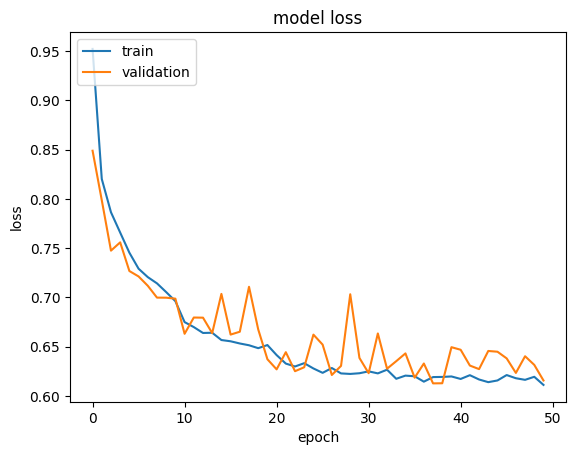

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

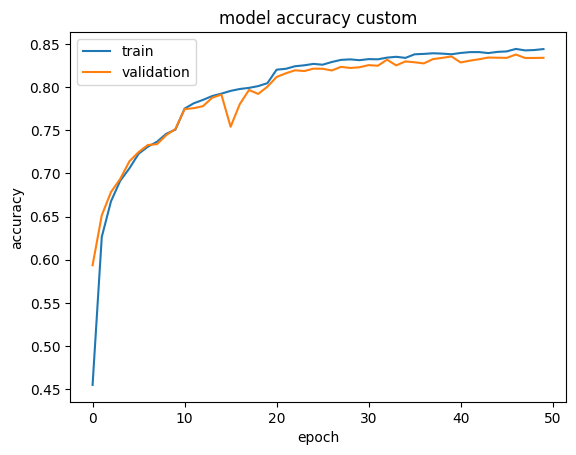

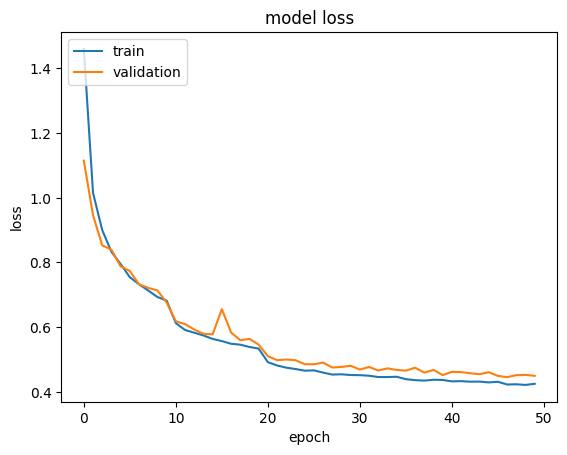

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + model_name)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()